# SARSA application to extended windy gridworld 

Application of SARSA algorithm to the windy-gridworld environment. Resolution of the 6.5 exercise, consisting on modifying the original problem definition so that oblicuous and recurrent moves (no moving) are allowed

In [1]:
import gym
# Install gym_gridworlds from @podondra
# Option 1: pip install gym_gridworlds
# Option 2: https://github.com/podondra/gym-gridworlds
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from IPython.display import clear_output

In [2]:
class SarsaAgent:
    def __init__(self, alpha, epsilon = 0.1, gamma=0.9):
        self.state_action_value = {}
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.n_actions=9
    
    def get_q_value(self, s, a):
        if not s in self.state_action_value:
            self.state_action_value[s] = {}
        
        if not a in self.state_action_value[s]:
            self.state_action_value[s][a] = random.random()
        
        return self.state_action_value[s][a]
    
    def set_q_value(self, s, a, value):
        if not s in self.state_action_value:
            self.state_action_value[s] = {}
        
        self.state_action_value[s][a] = value
        
    def update_q_values(self, s ,a ,r ,s_prime, a_prime):
        current_q_value = self.get_q_value(s, a)
        td_error = r + self.gamma*self.get_q_value(s_prime, a_prime) - current_q_value
        update = self.alpha*td_error
        new_q_value = current_q_value + update
        self.set_q_value(s, a, new_q_value)
        return update
        
    def get_action(self, state):
        if not state in self.state_action_value:
            return random.randint(0,self.n_actions-1)
        # epsilon greedy
        if random.random() > self.epsilon:
            return max(self.state_action_value[state].items(), key=lambda x:x[1])[0]
        else:
            return random.randint(0,self.n_actions-1)
        

In [3]:
env = gym.make("WindyGridworldExtended-v0")
agent = SarsaAgent(alpha = 0.05, epsilon = 0.1)
episodes=0
max_actions=75
updates=[]
returns=[]
total_actions=[]

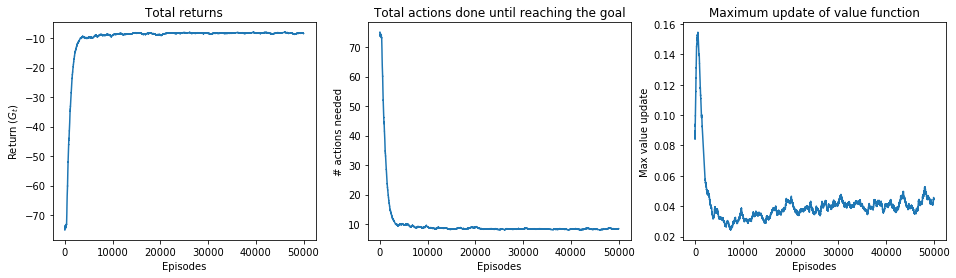

Actions needed: 8.361


In [4]:
# Run the episodes and adjust the SARSA agent
while episodes < 50000:
    updates.append(0)
    returns.append(0)

    episodes+=1
    state = env.reset()
    action = agent.get_action(state)
    done=False
    c=0
    
    while (done==False) and (c<max_actions):
        c+=1
        state_prime, reward, done, _ = env.step(action)
        action_prime = agent.get_action(state_prime)
        upd=agent.update_q_values(state, action, reward, state_prime, action_prime)
        state, action = state_prime, action_prime
        returns[-1]+=reward
        if updates[-1] < abs(upd):
            updates[-1] = abs(upd)
    total_actions.append(c)
    if c < max_actions:
        assert done==True
    if episodes %1000 ==0:
        clear_output(True)
        plt.figure(figsize=(16, 4))
        plt.subplot(131)
        plt.plot(pd.Series(returns).ewm(span=1000).mean())
        plt.title("Total returns")
        plt.xlabel("Episodes")
        plt.ylabel("Return ($G_t$)")
        plt.subplot(132)
        plt.plot(pd.Series(total_actions).ewm(span=1000).mean())
        plt.title("Total actions done until reaching the goal")
        plt.xlabel("Episodes")
        plt.ylabel("# actions needed")
        plt.subplot(133)
        plt.plot(pd.Series(updates).ewm(span=1000).mean())
        plt.title("Maximum update of value function")
        plt.xlabel("Episodes")
        plt.ylabel("Max value update")
        plt.show()
print("Actions needed: {}".format(np.mean(total_actions[-5000:])))

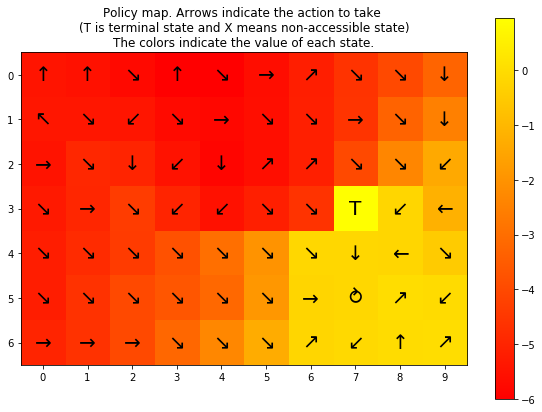

In [5]:
# Plot the value map and the policy
vals=[]
actions=[]
action_dict = {0: "↑",
               1: "→",
              2: "↓",
              3: "←",
              4: "↗",
              5: "↖",
              6: "↙",
              7: "↘",
              8: "⥁",
              np.nan: "X"}
for i in range(7):
    for j in range(10):
        if (i,j) in agent.state_action_value:
            action, value = max(agent.state_action_value[(i,j)].items(), key=lambda x:x[1])
        else:
            value = np.nan
            action = np.nan
        vals.append(value)
        actions.append(action_dict[action])

action_map = np.array(actions).reshape([7,10])
values_map = np.array(vals).reshape([7, 10])
action_map[3,7] = "T"

plt.figure(figsize=(10, 7))
plt.imshow(values_map, cmap=plt.cm.autumn)
for i in range(7):
        for j in range(10):
            text = plt.text(j, i, action_map[i, j],
                           ha="center", va="center", color="k", size=20, alpha=1)
plt.xticks(range(10))
plt.title("Policy map. Arrows indicate the action to take \n"+\
          "(T is terminal state and X means non-accessible state)\n"+\
          "The colors indicate the value of each state.")
plt.colorbar()
plt.show()